In [15]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import os
import xgboost as xgb
import matplotlib.pyplot as plt


In [45]:
all_data=pd.read_csv("axis2_demo_tablepart1_0.csv")

print(len(all_data))

#data = pd.read_csv('axis2_demo_tablepart1_0.csv')

# Assuming 'important_features.json' contains a JSON array of feature names
import json

with open('important_features.json', 'r') as file:
    features = json.load(file)[:10]

data_selected = all_data[features]

10000


In [46]:
data_selected.head(5)

,Standardabweichung_y,Variance_z,Variance_y,Standardabweichung_z,Effektivwert_x,Mittlere_Absolute_Abweichung_y,Effektivwert_y,Standardabweichung_x,Mittelwert_x,Variance_x
0,163.966,220962,26911.8,469.831,657.526,117.401,571.115,328.477,569.600,108005.0
1,171.940,235057,29592.9,484.584,627.592,122.691,571.746,309.810,545.792,96078.5
2,156.322,256573,24460.9,506.277,651.770,111.817,566.507,324.498,565.248,105404.0
3,174.714,241982,30555.6,491.670,653.578,123.620,568.931,325.453,566.784,106026.0
4,162.434,268509,26411.1,517.919,661.006,128.562,586.402,339.697,567.040,115510.0


In [55]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_selected)
data_scaled[2:3 , :]

array([[1.10611154e-03, 4.36220241e-04, 2.06424099e-05, 6.25969959e-03,
        2.72064937e-02, 1.59843147e-03, 1.64782844e-02, 3.81172612e-03,
        6.84932035e-01, 1.89942632e-04]])

In [37]:

# 数据归一化
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_selected)


# 准备数据集
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        b = dataset[i + look_back, :]
        Y.append(b)
    return np.array(X), np.array(Y)

look_back = 1
X, Y = create_dataset(data_scaled, look_back)
X_train, X_test = X[:9000], X[9000:]
Y_train, Y_test = Y[:9000], Y[9000:]
X_train=X_train.reshape(len(X_train),len(features))
X_test=X_test.reshape(len(X_test),len(features))
# 使用XGBoost训练模型
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, Y_train)

# 进行预测
y_pred = model.predict(X_test)

# print the actual and predicted values for each feature
import matplotlib.pyplot as plt

true_test = scaler.inverse_transform(Y_test)
y_pred_test = scaler.inverse_transform(y_pred)
# 创建足够的子图，每个特征一个子图，所有子图排列成一列
fig, axs = plt.subplots(len(features), 1, figsize=(10, 2*len(features)))  # 高度根据特征数量动态调整

for i in range(len(features)):
    # 如果只有一列，当只有一个特征时，axs不是列表，需要做一下处理
    ax = axs[i] if len(features) > 1 else axs
    
    ax.plot(true_test[:, i], label='Actual')
    ax.plot(y_pred_test[:, i], label='Predicted')
    ax.set_title(f'Feature: {features[i]}')
    ax.legend()

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()


In [68]:
import numpy as np

# 生成一个6x10的随机数组
array = np.random.rand(1, 10)

print(array)


[[0.48015173 0.38820822 0.23737739 0.46326693 0.89850229 0.69953667
  0.854714   0.34200662 0.29334272 0.9673981 ]]


In [67]:
array[1].shape

(10,)

In [69]:
y_pred_arr = model.predict(array)

y_pred_arr


array([[0.66890293, 0.22877522, 0.6208459 , 0.42756167, 0.34186634,
        0.7397818 , 0.50888264, 0.15853034, 0.4799016 , 0.05330889]],
      dtype=float32)

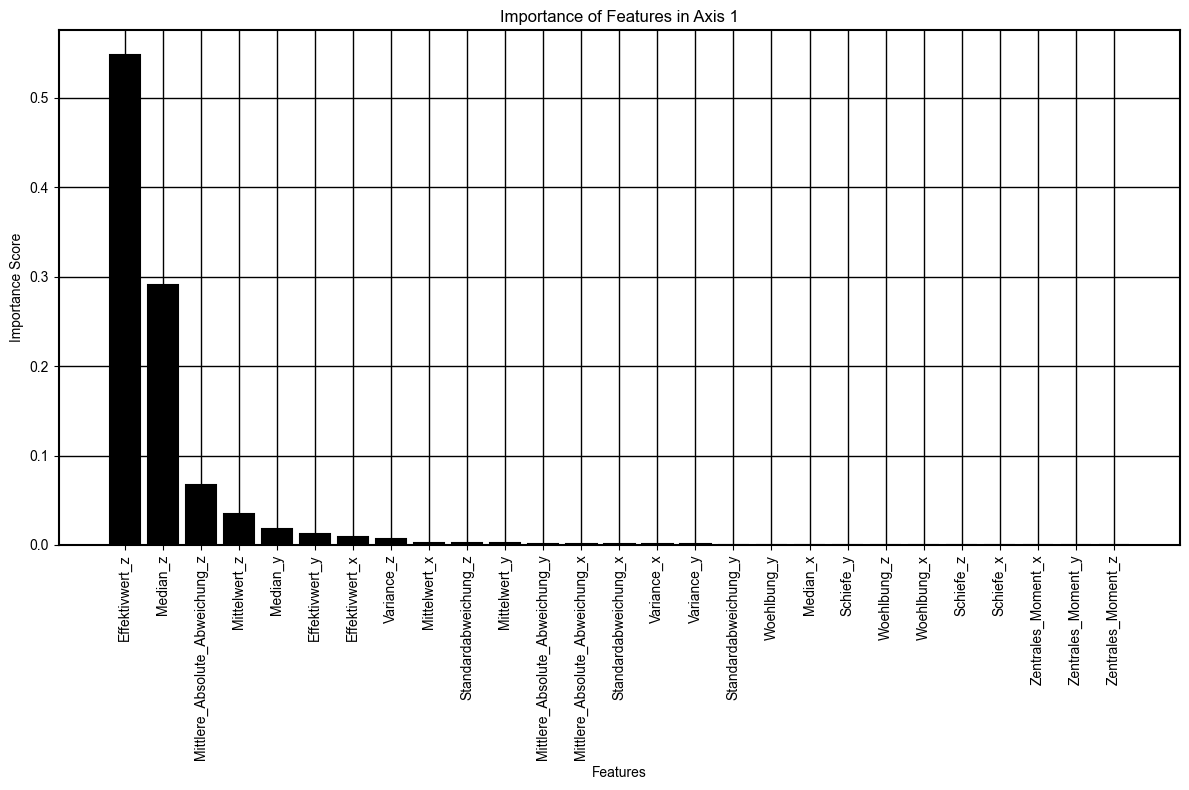

<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义特征名称和对应的重要性分数
features = [
    "Effektivwert_z", "Median_z", "Mittlere_Absolute_Abweichung_z", 
    "Mittelwert_z", "Median_y", "Effektivwert_y", "Effektivwert_x", 
    "Variance_z", "Mittelwert_x", "Standardabweichung_z", "Mittelwert_y", 
    "Mittlere_Absolute_Abweichung_y", "Mittlere_Absolute_Abweichung_x", 
    "Standardabweichung_x", "Variance_x", "Variance_y", "Standardabweichung_y", 
    "Woehlbung_y", "Median_x", "Schiefe_y", "Woehlbung_z", "Woehlbung_x", 
    "Schiefe_z", "Schiefe_x", "Zentrales_Moment_x", "Zentrales_Moment_y", 
    "Zentrales_Moment_z"
]

importance_scores = [
    0.5479, 0.2901, 0.0672, 0.0349, 0.0173, 0.0125, 0.0086, 0.0065, 0.0025, 
    0.0024, 0.0019, 0.0016, 0.0013, 0.0011, 0.0010, 0.0008, 0.0005, 0.0005, 
    0.0004, 0.0003, 0.0003, 0.0002, 0.0002, 0.0001, 0.0000, 0.0000, 0.0000
]

# 设置字体和线条宽度
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

# 创建图表
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制条形图
ax.bar(features, importance_scores, color='black', edgecolor='black', linewidth=1.5)

# 设置x轴标签的旋转角度和其他图表属性
ax.set_xlabel('Features')
ax.set_ylabel('Importance Score')
ax.set_title('Importance of Features in Axis 1')
ax.grid(True, linewidth=1.0, color='black')

# 调整x轴标签的显示，避免重叠
plt.xticks(rotation=90)

# 设置轴的线宽
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

# 调整图表布局，避免标签重叠
plt.tight_layout()

# 显示图表
plt.show()

# 保存图表
plt.savefig('importance_of_features_axis1.jpg')


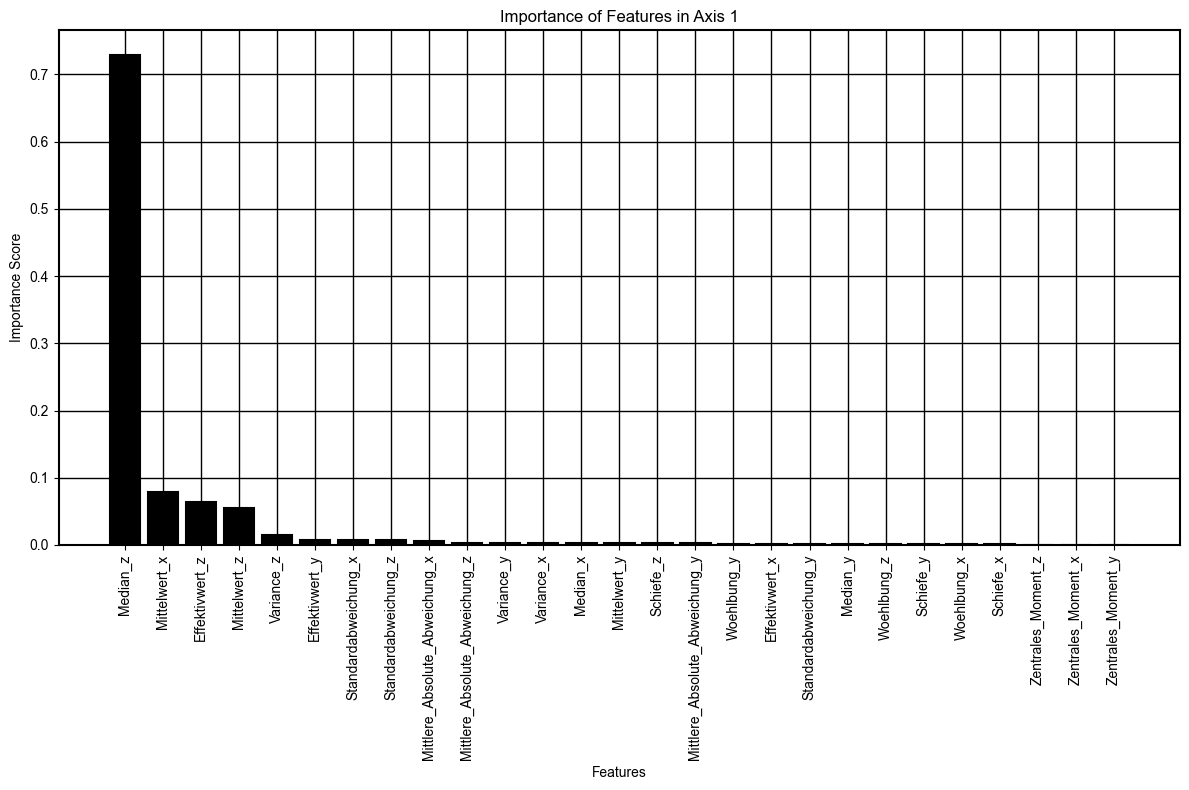

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt

# 定义特征名称和对应的重要性分数
features = [
    "Median_z", "Mittelwert_x", "Effektivwert_z", "Mittelwert_z", "Variance_z", 
    "Effektivwert_y", "Standardabweichung_x", "Standardabweichung_z", 
    "Mittlere_Absolute_Abweichung_x", "Mittlere_Absolute_Abweichung_z", 
    "Variance_y", "Variance_x", "Median_x", "Mittelwert_y", "Schiefe_z", 
    "Mittlere_Absolute_Abweichung_y", "Woehlbung_y", "Effektivwert_x", 
    "Standardabweichung_y", "Median_y", "Woehlbung_z", "Schiefe_y", 
    "Woehlbung_x", "Schiefe_x", "Zentrales_Moment_z", "Zentrales_Moment_x", 
    "Zentrales_Moment_y"
]

importance_scores = [
    0.7289, 0.0795, 0.0638, 0.0551, 0.0144, 0.0081, 0.0072, 0.0069, 0.0055, 
    0.0034, 0.0031, 0.0027, 0.0026, 0.0026, 0.0026, 0.0024, 0.0020, 0.0020, 
    0.0018, 0.0016, 0.0011, 0.0010, 0.0010, 0.0008, 0.0000, 0.0000, 0.0000
]

# 设置字体和线条宽度
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

# 创建图表
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制条形图
ax.bar(features, importance_scores, color='black', edgecolor='black', linewidth=1.5)

# 设置x轴标签的旋转角度和其他图表属性
ax.set_xlabel('Features')
ax.set_ylabel('Importance Score')
ax.set_title('Importance of Features in Axis 1')
ax.grid(True, linewidth=1.0, color='black')

# 调整x轴标签的显示，避免重叠
plt.xticks(rotation=90)

# 设置轴的线宽
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

# 调整图表布局，避免标签重叠
plt.tight_layout()

# 显示图表
plt.show()

# 保存图表
plt.savefig('importance_of_features_axis2.jpg')
